In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import util.functions as f
import util.parameters as param
from classes.Swarm import Swarm

In [2]:
"""   Declarations and definitions of PSO functions   """
# Update the velocity of a particle
def updateVelocity(i, p, g):
    r1 = np.random.random(param.DIM)
    r2 = np.random.random(param.DIM)
    p.v = param.W[i] * p.v + \
          param.C1 * r1 * (p.m - p.x) + \
          param.C2 * r2 * (g.x - p.x)
    for i in range(param.DIM):
        if(np.abs(p.v[i]) > param.VMAX):
            p.v[i] = np.sign(p.v[i]) * param.VMAX        
    
# Move a particle in the search space
def move(p):
    p.x = p.x + p.v
    for i in range(param.DIM):
        if(p.x[i] < param.RANGE[0]):
            p.x[i] = param.RANGE[0]
        if(p.x[i] > param.RANGE[1]):
            p.x[i] = param.RANGE[1]

# Evaluate a particle
def evaluate(p):
    p.evaluate()
    
# Update local and global best memories
def updatePBAndGB(p, g):
    if(p.fit_x <= p.fit_m):
        p.m = copy.deepcopy(p.x)
        p.fit_m = p.fit_x
        if(p.fit_x <= g.fit_x):
            g.x = copy.deepcopy(p.x)
            g.fit_x = p.fit_x
            
# Find the best particle from the swarm
def getGlobalBest(swarm):
    fits = [p.fit_x for p in swarm.particles]
    i = fits.index(min(fits))
    return swarm.particles[i].getCopy()


def evoluir(swarm):
    g = getGlobalBest(swarm)
    BEST = g
    bests_iteration, avg_iteration, std_iteration = [], [], []
    for i in range(param.NITERATION):
        best_now = getGlobalBest(swarm)
        bests_iteration.append(best_now.fit_x)
        avg_iteration.append(swarm.avgFitness())#media
        std_iteration.append(swarm.stdFitness(avg_iteration[i-1]))#Standard Deviation

        if BEST.fit_x < best_now.fit_x:
            BEST = best_now

        for j in range(param.NPARTICLE):
            updateVelocity(i, swarm.particles[j], g)
            move(swarm.particles[j])
            evaluate(swarm.particles[j])
            updatePBAndGB(swarm.particles[j], g)

    return {'swarm':swarm, 'best': BEST,'bests_iteration': bests_iteration, 'avg_iteration':avg_iteration, 'std_iteration':std_iteration}


def print_analitic(result):
    tp,fp,fn,tn = result[:4]
    print(f'\nTotal de casos   -> 	 {tp+fn+tn+fp}')
    print(f'Verdadeiros Positivos TP   -> 	 {tp}')
    print(f'Falsos Positivos FP        -> 	 {fp}')
    print(f'Verdadeiros Negativos TN   -> 	 {tn}')
    print(f'Falsos Negativos FN        -> 	 {fn}')
    print(f'Acuracia                   -> 	 {round((tp+tn)/(tp+fn+tn+fp),2)}%')
    print(f'Sensibilidade              -> 	 {result[5]}')
    print(f'Especificidade             -> 	 {result[4]}')
    func.plot_confusion_matrix(tp,fp,fn,tn)
    plt.show()


def print_evolution(swarm_treinado):
    plt.plot([c for c in range(len(swarm_treinado['avg_iteration']))], swarm_treinado['avg_iteration'], label='Avarege')
    plt.plot([c for c in range(len(swarm_treinado['std_iteration']))], swarm_treinado['std_iteration'], label='Standart')
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.xlabel("Iterations")
    plt.ylabel("Particulas")
    plt.show()

In [3]:
''' Instanci function'''
rows_trains, rows_test = 300, 300
func = f.Functions_utils(rows_trains, rows_test, 50)

In [4]:
"""   Main iteration of the algorithm   """
swarm = Swarm(func.sensibilidade_especifidade, param.NPARTICLE)
swarm.initialize()
swarm_treinado = evoluir(swarm)

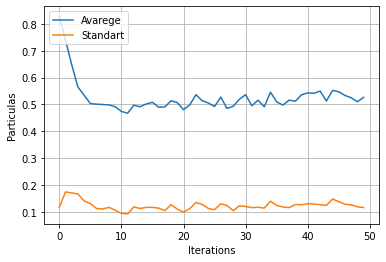

In [5]:
print_evolution(swarm_treinado)#plot do gráfico com média e desvio padrão

Best result found
X: [1.0, 0.994, 0.0, 0.7275, 0.0419, 0.0, 0.0978, 0.0836, 0.2805, 0.1017, 1.0, 0.2935, 1.0, 1.0, 1.0]
FITX: 4.2749e-01

Total de casos   -> 	 300
Verdadeiros Positivos TP   -> 	 87
Falsos Positivos FP        -> 	 62
Verdadeiros Negativos TN   -> 	 134
Falsos Negativos FN        -> 	 17
Acuracia                   -> 	 0.74%
Sensibilidade              -> 	 0.684
Especificidade             -> 	 0.837


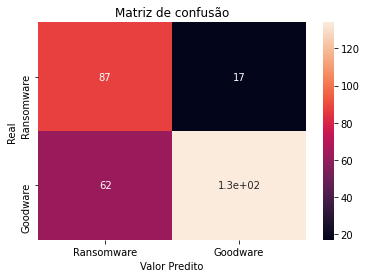

In [6]:
print("Best result found")  
print(swarm_treinado['best'])#melhor individuo 
result = func.sensibilidade_especifidade2(swarm_treinado['best'].x)#calcula o resultado do melhor individuo no dataset de treino
print_analitic(result)


Total de casos   -> 	 1224
Verdadeiros Positivos TP   -> 	 407
Falsos Positivos FP        -> 	 235
Verdadeiros Negativos TN   -> 	 511
Falsos Negativos FN        -> 	 71
Acuracia                   -> 	 0.75%
Sensibilidade              -> 	 0.685
Especificidade             -> 	 0.851


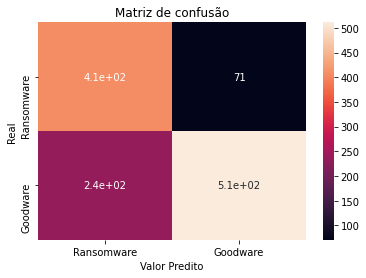

In [7]:
result = func.sensibilidade_especifidade3(swarm_treinado['best'].x)#calcula o resultado do melhor individuo no dataset de teste
print_analitic(result)